In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json

In [7]:
# training_data = {'params.json': [], "progress.csv": []}
df_list = []
for root, dirs, files in os.walk('/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/models/new'):
    for name in files:
        file = "{}/{}".format(root,name)     
        if name.endswith(("csv")):
            d = pd.read_csv(file)
            d['battery_size'] = root.split("battery_size=")[1].split("_")[0]
#             d['lr'] = root.split(",lr=")[1].split("_")[0]
#             training_data['progress.csv'].append(d)
            df_list.append(d)
training = pd.concat(df_list)
training.head()

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,info/num_steps_sampled,info/num_steps_trained,info/last_target_update_ts,info/num_target_updates,perf/cpu_util_percent,perf/ram_util_percent,info/learner/default_policy/mean_q,info/learner/default_policy/max_q,info/learner/default_policy/min_q,battery_size
0,-94.092865,-94.092865,-94.092865,2352.0,1,1,2500,False,1,1,...,2500,256256,2500,1001,65.824306,59.508333,-0.090047,0.022395,-0.382871,0.8
1,-51.538515,-94.092865,-72.815690,2352.0,1,1,5000,False,2,2,...,5000,896256,5000,3501,77.381269,59.276737,-0.154232,0.038424,-0.443930,0.8
2,-51.538515,-94.092865,-65.730253,2352.0,1,1,7500,False,3,3,...,7500,1536256,7500,6001,79.453509,59.401754,-0.229806,-0.005638,-0.661573,0.8
3,-51.538515,-94.092865,-63.096899,2352.0,1,1,10000,False,4,4,...,10000,2176256,10000,8501,80.734000,58.762286,-0.268308,-0.032506,-0.695962,0.8
4,-51.156093,-94.092865,-60.708738,2352.0,1,1,12500,False,5,5,...,12500,2816256,12500,11001,76.525429,57.708571,-0.266698,-0.018030,-0.702748,0.8


In [8]:
training['battery_size'] = pd.to_numeric(training['battery_size'])
training.to_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/results/training/training_results.csv")

Text(0, 0.5, 'Mean episode reward')

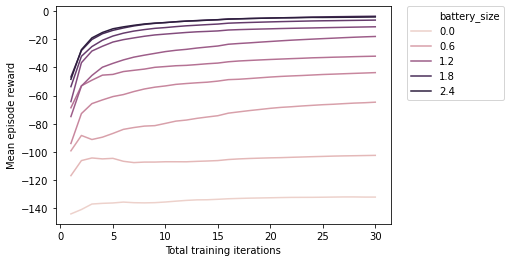

In [9]:
sns.lineplot(data=training, x="training_iteration", y='episode_reward_mean', hue="battery_size")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Total training iterations")
plt.ylabel("Mean episode reward")